In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
data = xr.open_mfdataset('C:/Users/hp/OneDrive/Desktop/PYTHON/UKRAINE/*.nc')
UKRAINE = data.where(data != -99.0)

In [3]:
UKRAINE_data = UKRAINE.precip
UKRAINE_data

<xarray.DataArray 'precip' (datetime: 3652, lat: 34, lon: 74)>
dask.array<where, shape=(3652, 34, 74), dtype=float32, chunksize=(366, 34, 74), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 22.0 22.25 22.5 22.75 23.0 ... 39.5 39.75 40.0 40.25
  * lat       (lat) float32 52.75 52.5 52.25 52.0 ... 45.25 45.0 44.75 44.5
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
Attributes:
    grid_mapping:  crs

In [4]:
monthly_data = UKRAINE_data.groupby('datetime.month')
yearly_data = UKRAINE_data.groupby('datetime.year')

In [5]:
# monthly rainfall totals
mon_rainfall_totals = monthly_data.sum('datetime')

# monthly climatologies rainfall totals
mon_mean_climo_totals = monthly_data.sum('datetime').mean('month')

In [6]:
# annual totals
annual_totals = yearly_data.sum()

# annual climatology totals
annual_climo_totals = yearly_data.sum('datetime').mean('year')

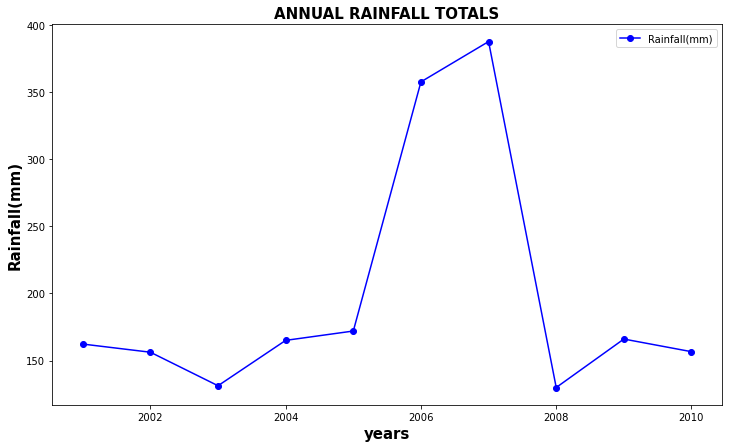

In [25]:
# ANNUAL RAINFALL TOTALS
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,annual_totals.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Rainfall(mm)',marker='o')
ax.set_title('ANNUAL RAINFALL TOTALS', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("years", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('Rainfall(mm)', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('1.png');

In [8]:
#DRY days per year
dryDays_per_year = UKRAINE_data.where(UKRAINE_data < 1).groupby('datetime.year').count('datetime')

#WET days per year
wetDays_per_year = UKRAINE_data.where(UKRAINE_data >= 1).groupby('datetime.year').count('datetime')

#DRY days per MONTH
dryDays_per_month = UKRAINE_data.where(UKRAINE_data < 1).groupby('datetime.month').count('datetime')

#WET days per MONTH
wetDays_per_month = UKRAINE_data.where(UKRAINE_data >= 1).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per year
Xrain10 = UKRAINE_data.where(UKRAINE_data > 10).groupby('datetime.year').count('datetime')

# Extreme Rainfall >20mm per year
Xrain20 = UKRAINE_data.where(UKRAINE_data > 20).groupby('datetime.year').count('datetime')

# Extreme Rainfall >10mm per month
Xrain10M = UKRAINE_data.where(UKRAINE_data > 10).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per month
Xrain20M = UKRAINE_data.where(UKRAINE_data > 20).groupby('datetime.month').count('datetime')

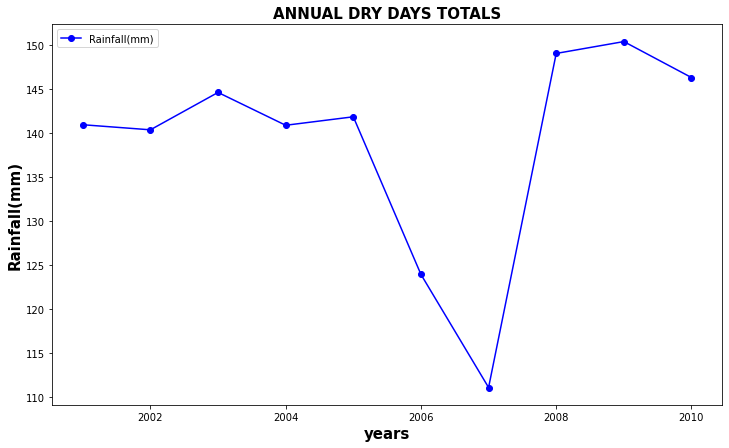

In [26]:
# ANNUAL DRY DAYS TOTALS
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,dryDays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Rainfall(mm)',marker='o')
ax.set_title('ANNUAL DRY DAYS TOTALS', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("years", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('Rainfall(mm)', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('2.png');

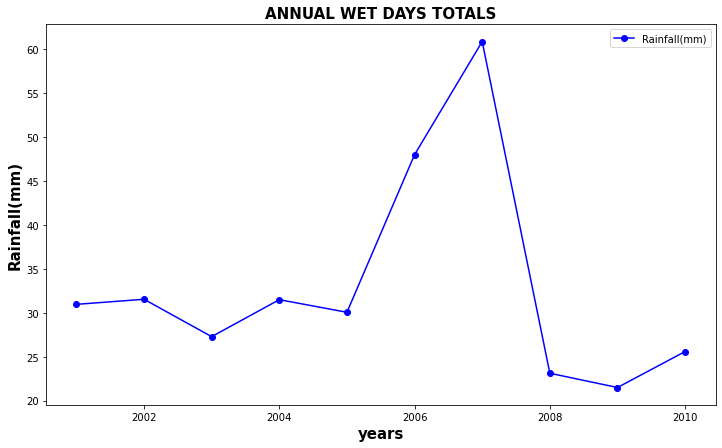

In [27]:
# ANNUAL WET DAYS TOTALS
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,wetDays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Rainfall(mm)',marker='o')
ax.set_title('ANNUAL WET DAYS TOTALS', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("years", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('Rainfall(mm)', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('3.png');

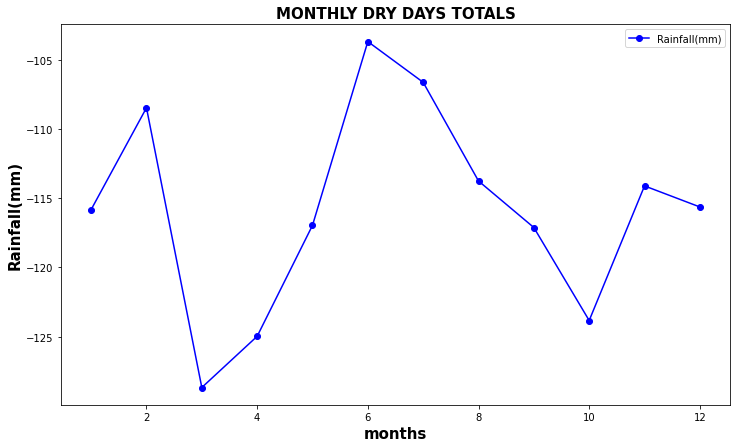

In [28]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,dryDays_per_month.mean(['lon','lat'])*-1,color = 'blue', lw = 1.5 ,label= 'Rainfall(mm)',marker='o')
ax.set_title('MONTHLY DRY DAYS TOTALS', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("months", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('Rainfall(mm)', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('4.png');

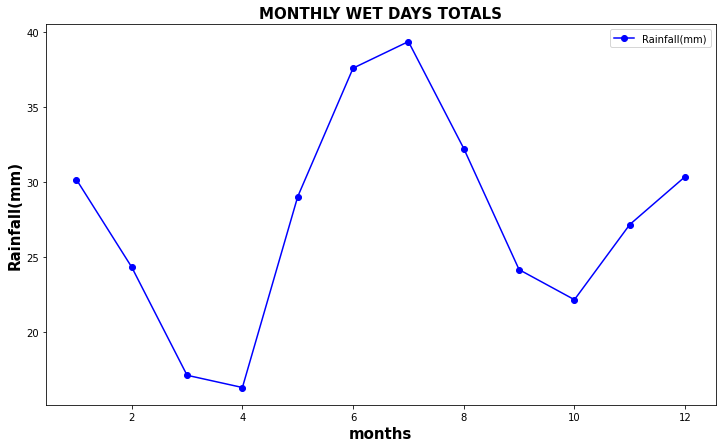

In [29]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,wetDays_per_month.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Rainfall(mm)',marker='o')
ax.set_title('MONTHLY WET DAYS TOTALS', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("months", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('Rainfall(mm)', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('5.png');

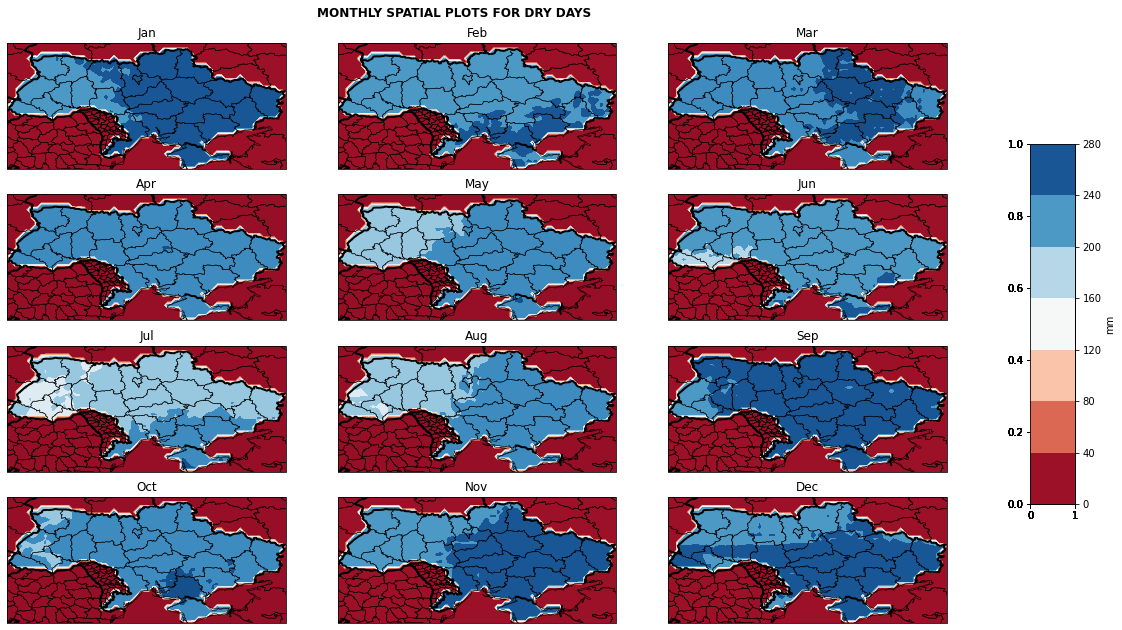

In [30]:
# MONTHLY SPATIAL PLOTS FOR DRY DAYS
fig,ax=plt.subplots(4,3,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.0,40.25,52.75,44.5])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dryDays_per_month.lon, dryDays_per_month.lat, dryDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='mm')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY SPATIAL PLOTS FOR DRY DAYS', fontweight='bold');
plt.savefig('6.png');

#### 

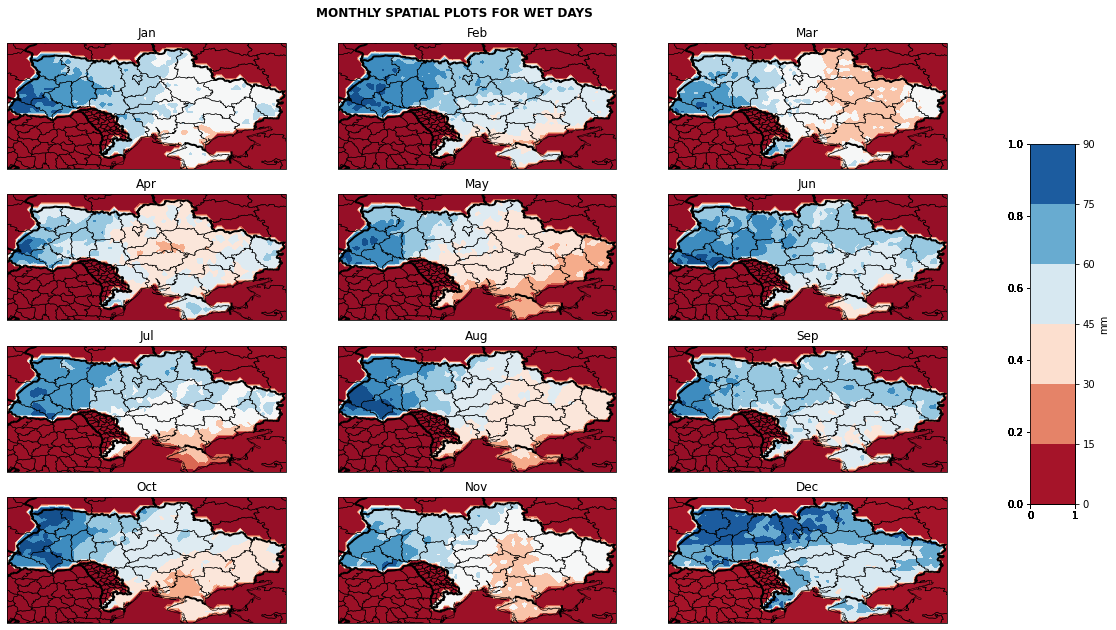

In [31]:
# MONTHLY SPATIAL PLOTS FOR WET DAYS
fig,ax=plt.subplots(4,3,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.0,40.25,52.75,44.5])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wetDays_per_month.lon, wetDays_per_month.lat, wetDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='mm')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY SPATIAL PLOTS FOR WET DAYS', fontweight='bold');
plt.savefig('7.jpeg');

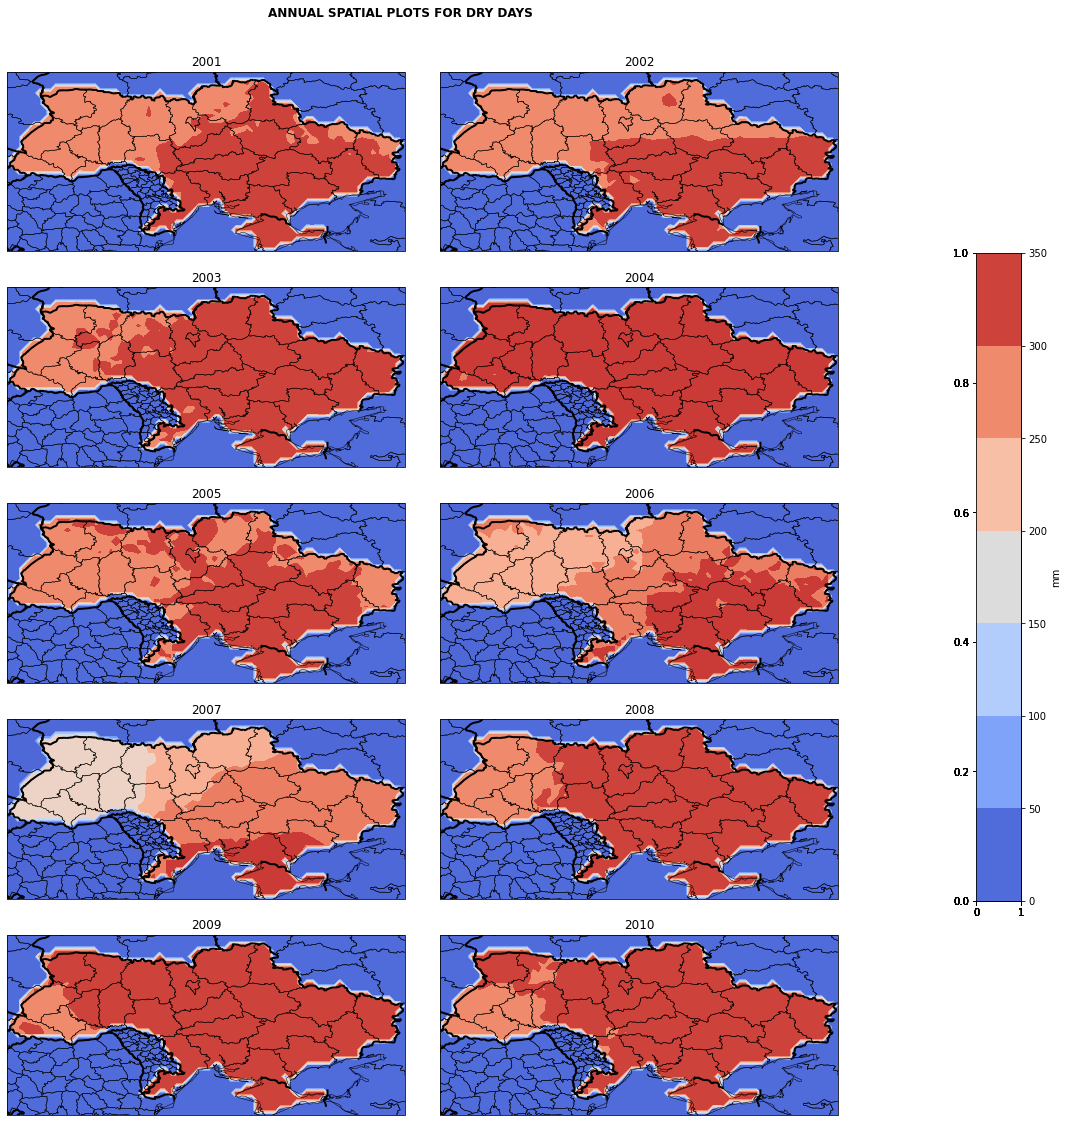

In [32]:
# ANNUAL SPATIAL PLOTS FOR DRY DAYS
fig,ax=plt.subplots(5,2,figsize=(25, 18), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.0,40.25,52.75,44.5])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(dryDays_per_year.lon, dryDays_per_year.lat, dryDays_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='mm')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('ANNUAL SPATIAL PLOTS FOR DRY DAYS', fontweight='bold');
plt.savefig('8.jpeg');

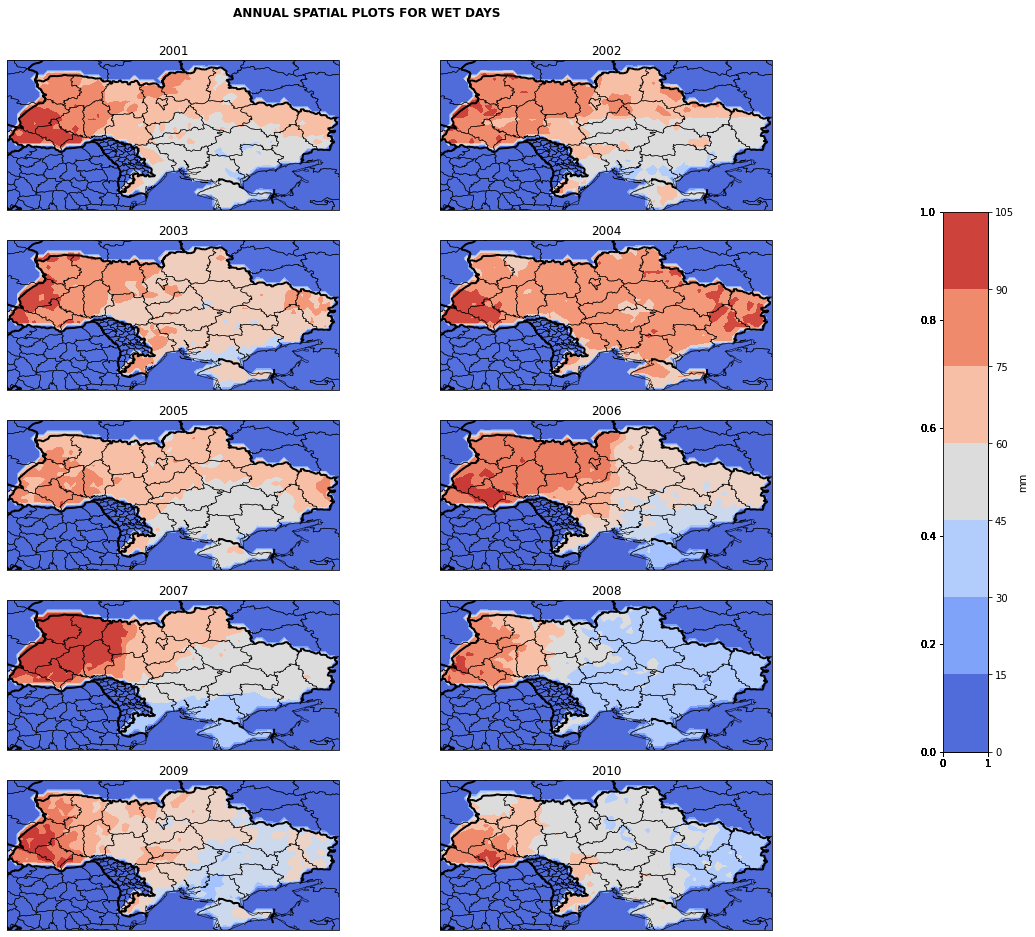

In [33]:
# ANNUAL SPATIAL PLOTS FOR WET DAYS
fig,ax=plt.subplots(5,2,figsize=(25,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.0,40.25,52.75,44.5])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(wetDays_per_year.lon, wetDays_per_year.lat, wetDays_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='mm')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('ANNUAL SPATIAL PLOTS FOR WET DAYS', fontweight='bold');
plt.savefig('9.jpeg');

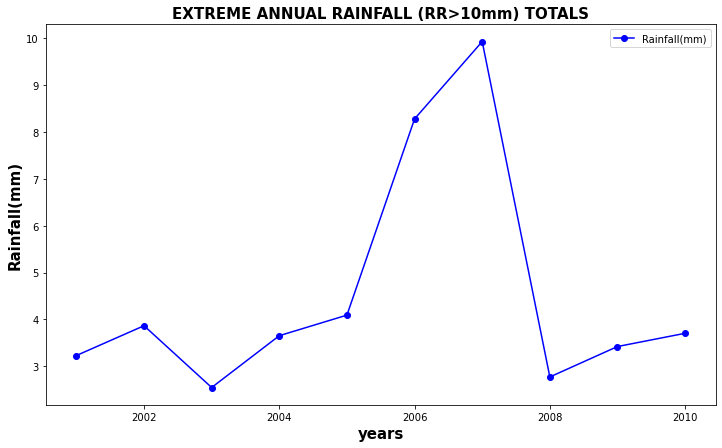

In [34]:
# EXTREME ANNUAL RAINFALL (RR>10mm) TOTALS
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10.year,Xrain10.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Rainfall(mm)',marker='o')
ax.set_title('EXTREME ANNUAL RAINFALL (RR>10mm) TOTALS', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("years", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('Rainfall(mm)', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('10.png');

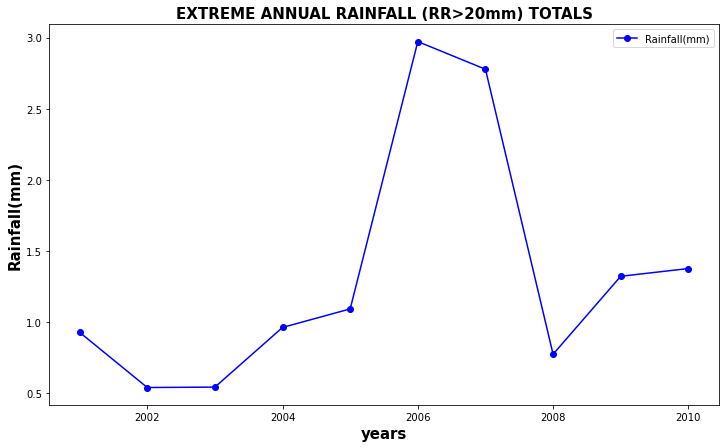

In [36]:
# EXTREME ANNUAL RAINFALL (RR>20mm) TOTALS
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20.year,Xrain20.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Rainfall(mm)',marker='o')
ax.set_title('EXTREME ANNUAL RAINFALL (RR>20mm) TOTALS', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("years", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('Rainfall(mm)', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('11.png');

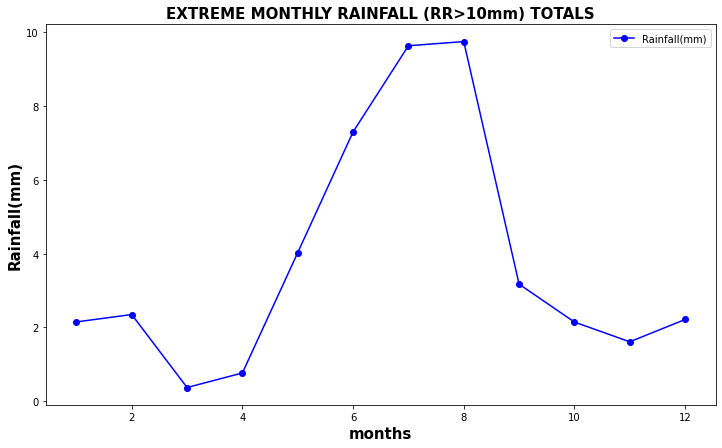

In [37]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10M.month,Xrain10M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Rainfall(mm)',marker='o')
ax.set_title('EXTREME MONTHLY RAINFALL (RR>10mm) TOTALS', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("months", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('Rainfall(mm)', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('12.png');

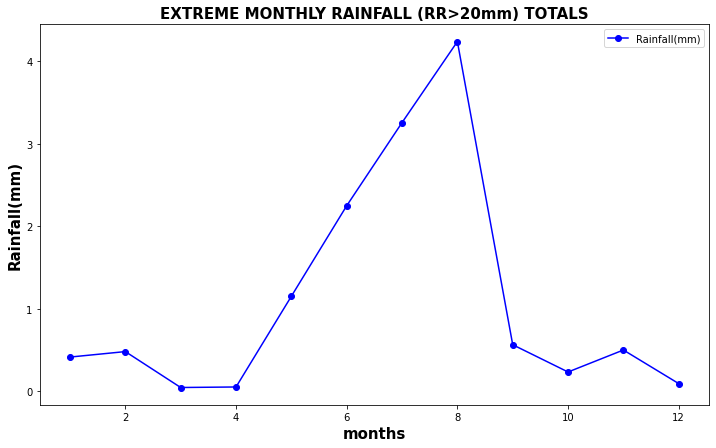

In [38]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20M.month,Xrain20M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Rainfall(mm)',marker='o')
ax.set_title('EXTREME MONTHLY RAINFALL (RR>20mm) TOTALS', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("months", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('Rainfall(mm)', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('13.png');

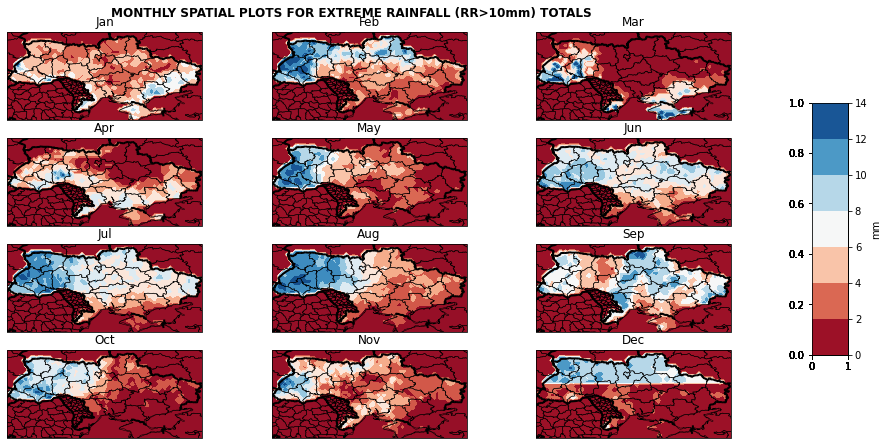

In [39]:
# MONTHLY SPATIAL PLOTS FOR EXTREME RAINFALL (RR>10mm) TOTALS
fig,ax=plt.subplots(4,3,figsize=(20,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.0,40.25,52.75,44.5])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain10M.lon, Xrain10M.lat, Xrain10M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='mm')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY SPATIAL PLOTS FOR EXTREME RAINFALL (RR>10mm) TOTALS', fontweight='bold');
plt.savefig('14.png');

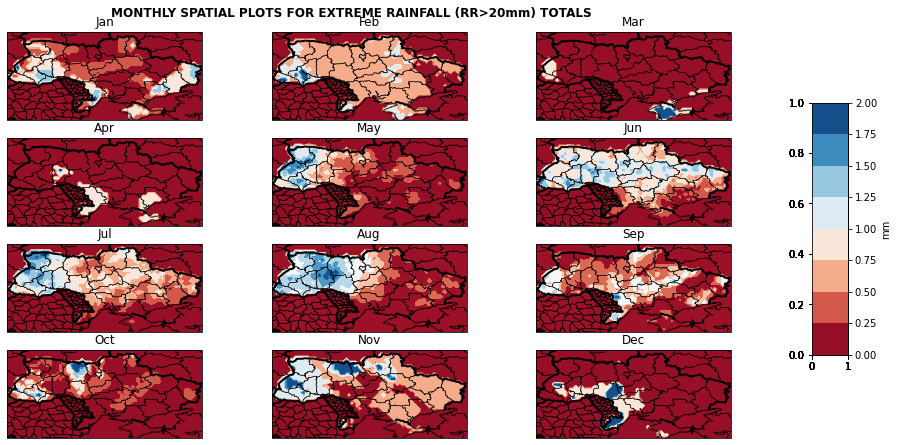

In [40]:
# MONTHLY SPATIAL PLOTS FOR EXTREME RAINFALL (RR>20mm) TOTALS
fig,ax=plt.subplots(4,3,figsize=(20,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.0,40.25,52.75,44.5])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain20M.lon, Xrain20M.lat, Xrain20M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='mm')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY SPATIAL PLOTS FOR EXTREME RAINFALL (RR>20mm) TOTALS', fontweight='bold');
plt.savefig('15.png');

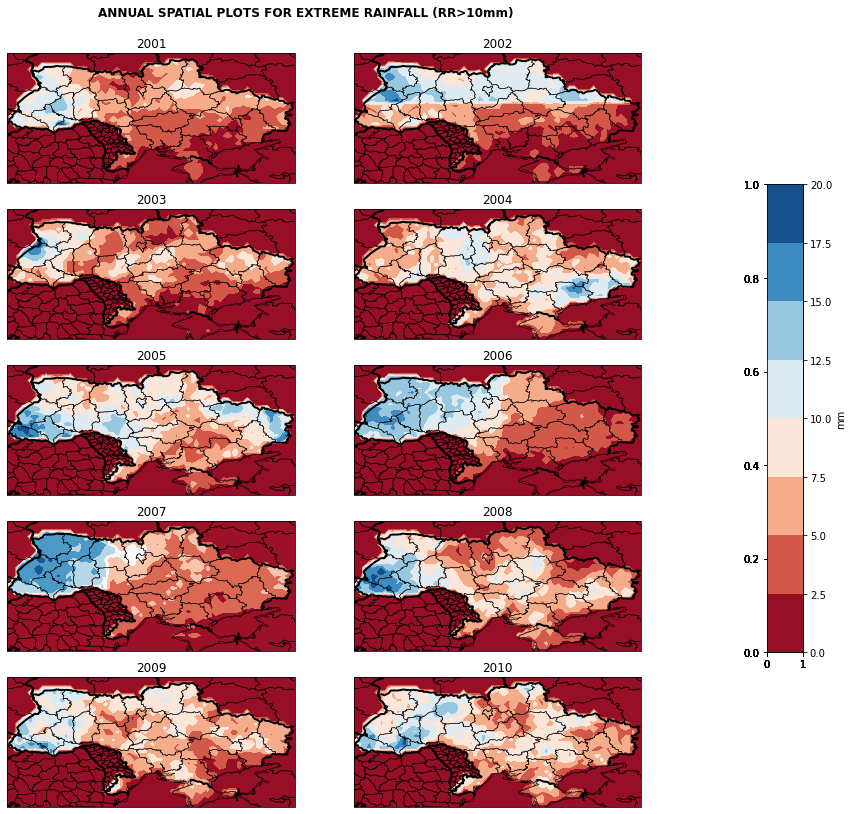

In [41]:
# ANNUAL SPATIAL PLOTS FOR EXTREME RAINFALL (RR>10mm)
fig,ax=plt.subplots(5,2,figsize=(20,13), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.0,40.25,52.75,44.5])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain10.lon, Xrain10.lat, Xrain10[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='mm')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('ANNUAL SPATIAL PLOTS FOR EXTREME RAINFALL (RR>10mm)', fontweight='bold');
plt.savefig('16.png');

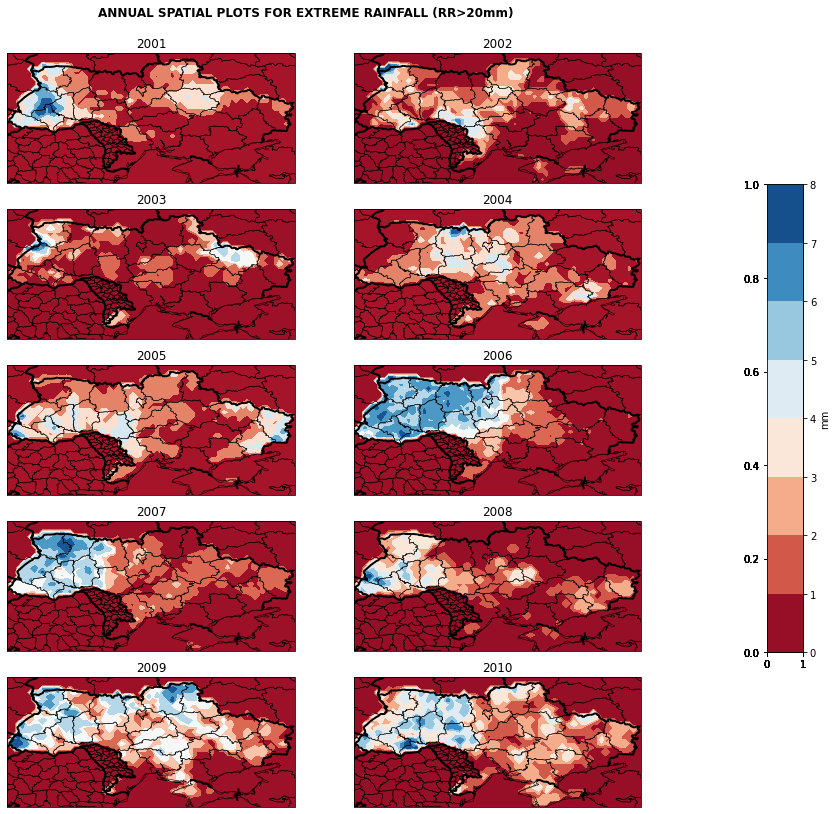

In [42]:
# ANNUAL SPATIAL PLOTS FOR EXTREME RAINFALL (RR>20mm)
fig,ax=plt.subplots(5,2,figsize=(20,13), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([22.0,40.25,52.75,44.5])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain20.lon, Xrain20.lat, Xrain20[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='mm')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('ANNUAL SPATIAL PLOTS FOR EXTREME RAINFALL (RR>20mm)', fontweight='bold');
plt.savefig('17.png');